# Introduction to PyTorch

PyTorch is a key tool for machine learning and deep learning. Think of it as a mechanic's toolbox, providing everything you need to easily build and train complex models. This notebook will give you a solid understanding of PyTorch's core concepts, enabling you to expand your knowledge and explore the depths of machine learning models.

## Outline

We'll cover the following topics:
* **PyTorch Tensors**: Multidimensional arrays and the foundational data structure in PyTorch.
* **Neural Nets in PyTorch**: Handled by the useful `torch.nn` module.
* **PyTorch Loss Functions**: Define the objective function we wish to minimize during training.
* **PyTorch Optimizers**: The algorithms we use for minimizing our loss functions.
* **Datasets and Data Loaders in PyTorch**: Useful tools for working with data at scale easily.
* **Training loops in PyTorch**: Define the fundamental steps for training a deep learning model.

## PyTorch Tensors

Drawing a parallel to mathematics, tensors can be likened to vectors and matrices, but with the capability to have more than two dimensions.

Let’s take a look at using pytorch tensors to store images. Suppose we have four grayscale images, each of size 28x28 pixels. We can represent these images as a 4x28x28 tensor in PyTorch. Here, `images` is a 3D tensor where the first dimension corresponds to the number of images, and the subsequent dimensions represent the height and width of each image. In this case we’ll create 4 images of random noise.

In [1]:
import torch
import matplotlib.pyplot as plt

images = torch.rand(4, 28, 28)
# To access the second image
second_image = images[1]
print(second_image)

tensor([[1.8366e-02, 5.4725e-01, 8.4380e-01, 3.5491e-01, 7.8561e-01, 4.6344e-01,
         3.2411e-01, 8.7513e-01, 8.3474e-01, 1.5680e-01, 7.4894e-01, 4.9487e-01,
         8.2507e-01, 8.4637e-01, 4.9468e-02, 8.3969e-01, 6.1561e-01, 2.8184e-01,
         3.9038e-01, 8.0175e-01, 8.8512e-01, 9.3458e-01, 2.9582e-01, 2.5265e-01,
         8.1913e-01, 1.7062e-01, 3.4448e-01, 4.4747e-01],
        [6.4026e-01, 1.1694e-01, 3.6104e-01, 5.3472e-01, 1.9283e-01, 7.1908e-01,
         9.1120e-01, 8.3796e-01, 2.3296e-01, 6.2427e-01, 9.1250e-01, 5.8930e-01,
         9.2085e-01, 8.3160e-01, 2.9857e-01, 6.0772e-02, 9.6466e-02, 3.7611e-02,
         4.2116e-01, 9.4699e-01, 1.8819e-01, 5.6174e-01, 9.0469e-01, 3.0889e-01,
         1.3949e-01, 5.5286e-01, 8.1606e-01, 3.6672e-01],
        [6.4918e-01, 8.2750e-01, 1.3733e-01, 3.6943e-01, 9.4366e-01, 8.1554e-01,
         9.2853e-01, 1.5553e-01, 5.8044e-01, 3.9109e-01, 4.0178e-01, 1.3676e-01,
         9.0209e-01, 9.4271e-01, 4.2274e-01, 9.5165e-02, 5.5381e-01, 8.405

To display an image from a PyTorch tensor, you can use the `matplotlib` library. Here's an example of how you would display the image. We use the `imshow` function from `matplotlib.pyplot` to display the image. The `cmap='gray'` argument ensures that the image is displayed in grayscale.

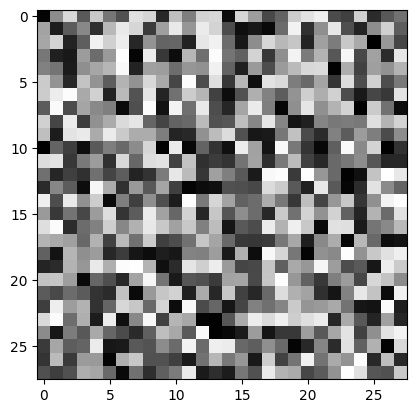

In [2]:
plt.imshow(second_image, cmap='gray')
plt.show()

Since we used `torch.rand` to generate these four images randomly, we get noise as expected.
If you are familiar with matrices, then you will be at home with PyTorch tensors, since they offer all the same things you can do with a matrix. For instance, take the 2x2 matrix A. Let’s calculate the 1st, 2nd, 3rd, and 4th powers of this matrix, using matrix multiplication.

In [3]:
A = torch.tensor([[1, 1], [1, 0]], dtype=torch.float32)
print("A^1:\n", torch.matrix_power(A, 1))
print("A^2:\n", torch.matrix_power(A, 2))
print("A^3:\n", torch.matrix_power(A, 3))
print("A^4:\n", torch.matrix_power(A, 4))

A^1:
 tensor([[1., 1.],
        [1., 0.]])
A^2:
 tensor([[2., 1.],
        [1., 1.]])
A^3:
 tensor([[3., 2.],
        [2., 1.]])
A^4:
 tensor([[5., 3.],
        [3., 2.]])


## Neural Nets in PyTorch

Moving on, PyTorch provides robust tools for the creation and manipulation of neural networks. Think of neural networks as intricate systems of interconnected nodes. Each node or neuron processes input and transmits the result to subsequent nodes. The simplest form of a neural network is a Multi-Layer Perceptron (MLP). In an MLP, there is an input layer, an output layer, and any number of hidden layers in the middle. Let’s make a Multi-Layer Perceptron with one hidden layer using PyTorch.

In [4]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, 64)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(64, 2)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

We can now instantiate the multi-layer perceptron with an input size of 10 and print the model to review the sizes of our layers.

In [5]:
model = MLP(input_size=10)
print(model)

MLP(
  (hidden_layer): Linear(in_features=10, out_features=64, bias=True)
  (activation): ReLU()
  (output_layer): Linear(in_features=64, out_features=2, bias=True)
)


We can test out the `forward` method of the model by passing in a vector of length 10. As expected, we receive a vector of length 2.

In [6]:
input_vector = torch.randn(10)
output = model(input_vector)
print(output)

tensor([-0.0060,  0.1224], grad_fn=<ViewBackward0>)


## Loss Functions

Let’s discuss loss functions in PyTorch now. Loss functions play a pivotal role in guiding model optimization. These functions quantify the discrepancy between the predicted output and the actual target values. We’ll look at two very important building blocks: Cross-Entropy Loss and Mean Squared Error (MSE) Loss.

We start with a cross-entropy loss function, which is suited for classification tasks.

In [7]:
cross_entropy_loss = nn.CrossEntropyLoss()
target = torch.tensor([1]) # 0 for cats, 1 for dogs. Label is for dog.

# Case 1: Prediction is more likely a dog
predicted1 = torch.tensor([[2.0, 5.0]])
loss1 = cross_entropy_loss(predicted1, target)
print(f"Loss when prediction is more likely a dog: {loss1.item():.4f}")

# Case 2: Prediction is more likely a cat
predicted2 = torch.tensor([[1.5, 1.1]])
loss2 = cross_entropy_loss(predicted2, target)
print(f"Loss when prediction is more likely a cat: {loss2.item():.4f}")

Loss when prediction is more likely a dog: 0.0486
Loss when prediction is more likely a cat: 0.9130


Mean Squared Error (MSE) Loss is commonly employed in regression problems. Consider a situation where we aim to predict house prices. Let's say for a specific house, our model predicts a price of $320,000, but the actual price is $300,000.

In [8]:
mse_loss = nn.MSELoss()
predicted_price = torch.tensor([320000.0])
actual_price = torch.tensor([300000.0])
loss = mse_loss(predicted_price, actual_price)
print(f"MSE Loss: {loss.item()}")

MSE Loss: 400000000.0


## PyTorch Optimizers

After we have a loss function, we need to train the model by minimizing its loss function. For this, we use a PyTorch optimizer. One popular optimizer is Stochastic Gradient Descent (SGD).

In [9]:
from torch.optim import SGD, Adam

# Assuming 'model' is our MLP defined earlier
optimizer_sgd = SGD(model.parameters(), lr=0.01, momentum=0.9)
print("SGD Optimizer instantiated.")

# Adam is another popular optimizer.
optimizer_adam = Adam(model.parameters(), lr=0.01)
print("Adam Optimizer instantiated.")

SGD Optimizer instantiated.
Adam Optimizer instantiated.


## Datasets and DataLoaders

In the PyTorch framework, the handling of data is facilitated through the `Dataset` class and the `DataLoader` utility. The `Dataset` class serves as a blueprint for how data is accessed and transformed, while the `DataLoader` is a utility that wraps around a `Dataset` object to provide batched, shuffled, and parallelized loading of data.

Let's design an example to define a dataset for returning pairs of numbers and their products.

In [10]:
from torch.utils.data import Dataset, DataLoader

class NumberProductDataset(Dataset):
    def __init__(self, data_range):
        self.data = [(i, i + 1, i * (i + 1)) for i in range(data_range)]

    def __getitem__(self, idx):
        return self.data[idx]

    def __len__(self):
        return len(self.data)

dataset = NumberProductDataset(data_range=11)
sample = dataset[3] # pick the 4th element (index 3)
print(f"Input: {sample[0]}, {sample[1]}, Output: {sample[2]}")

Input: 3, 4, Output: 12


Now let's turn to the example of the `DataLoader`. Our data loader will take our `NumberProductDataset` as an input. We will also specify a batch size of three and set shuffle to true.

In [11]:
dataloader = DataLoader(dataset, batch_size=3, shuffle=True)
for i, (input1, input2, output) in enumerate(dataloader):
    print(f"Batch {i+1}:")
    print(f"  Inputs 1: {input1}")
    print(f"  Inputs 2: {input2}")
    print(f"  Outputs: {output}")

Batch 1:
  Inputs 1: tensor([ 0,  8, 10])
  Inputs 2: tensor([ 1,  9, 11])
  Outputs: tensor([  0,  72, 110])
Batch 2:
  Inputs 1: tensor([1, 3, 4])
  Inputs 2: tensor([2, 4, 5])
  Outputs: tensor([ 2, 12, 20])
Batch 3:
  Inputs 1: tensor([9, 5, 7])
  Inputs 2: tensor([10,  6,  8])
  Outputs: tensor([90, 30, 56])
Batch 4:
  Inputs 1: tensor([6, 2])
  Inputs 2: tensor([7, 3])
  Outputs: tensor([42,  6])


## Training Loop

Ok. Now we’re at the final step. Let's bring together all the components of PyTorch and show a full-fledged training loop!

For this example, we will create a simple dataset, consisting of pairs of numbers and their sums.

In [12]:
class NumberSumDataset(Dataset):
    def __init__(self, data_range):
        self.data = []
        for i in range(data_range):
            for j in range(data_range):
                self.data.append(([i, j], i + j))

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx][0], dtype=torch.float32), torch.tensor(self.data[idx][1], dtype=torch.float32)

    def __len__(self):
        return len(self.data)

# Print the first five elements to verify
sum_dataset = NumberSumDataset(data_range=10)
for i in range(5):
    print(sum_dataset[i])

(tensor([0., 0.]), tensor(0.))
(tensor([0., 1.]), tensor(1.))
(tensor([0., 2.]), tensor(2.))
(tensor([0., 3.]), tensor(3.))
(tensor([0., 4.]), tensor(4.))


Next, we define a multi-layer perceptron with 128 nodes in its hidden layer and a single node in its output layer. For the activation function, we use a rectified linear unit.

In [13]:
class SumMLP(nn.Module):
    def __init__(self):
        super(SumMLP, self).__init__()
        self.hidden_layer = nn.Linear(2, 128)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(128, 1)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

All of the components needed for the training loop are listed here.

In [14]:
sum_dataset = NumberSumDataset(data_range=10)
sum_dataloader = DataLoader(sum_dataset, batch_size=10, shuffle=True)
sum_model = SumMLP()
loss_function = nn.MSELoss()
optimizer = Adam(sum_model.parameters(), lr=0.01)

Here is the training loop!

In [15]:
num_epochs = 20
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for inputs, targets in sum_dataloader:
        optimizer.zero_grad()
        predictions = sum_model(inputs)
        loss = loss_function(predictions.squeeze(), targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(sum_dataloader):.4f}")

Epoch 1/20, Loss: 14.9183
Epoch 2/20, Loss: 2.6584
Epoch 3/20, Loss: 1.5372
Epoch 4/20, Loss: 0.4976
Epoch 5/20, Loss: 0.1549
Epoch 6/20, Loss: 0.0614
Epoch 7/20, Loss: 0.0358
Epoch 8/20, Loss: 0.0172
Epoch 9/20, Loss: 0.0090
Epoch 10/20, Loss: 0.0060
Epoch 11/20, Loss: 0.0042
Epoch 12/20, Loss: 0.0038
Epoch 13/20, Loss: 0.0029
Epoch 14/20, Loss: 0.0028
Epoch 15/20, Loss: 0.0031
Epoch 16/20, Loss: 0.0025
Epoch 17/20, Loss: 0.0020
Epoch 18/20, Loss: 0.0012
Epoch 19/20, Loss: 0.0011
Epoch 20/20, Loss: 0.0010


Now it's time to try our model out! What about using the numbers 3 and 7?

In [16]:
test_input = torch.tensor([3.0, 7.0])
prediction = sum_model(test_input)
print(f"Prediction for 3 + 7: {prediction.item():.1f}")

Prediction for 3 + 7: 10.0


Now you understand the core building blocks of PyTorch, equipping you with essential tools for developing powerful machine learning models.